<h1>Import Python Packages</h1>

In [6]:
import sys
sys.path.insert(0,'/global/project/projectdirs/metatlas/anaconda/lib/python2.7/site-packages' )

import dill2plots as dp
import metatlas_get_data_helper_fun as ma_data
from metatlas import metatlas_objects as metob
from metatlas.helpers import rt_corrector as rt_corrector

%matplotlib notebook

# Make blank file-info sheet

In [ ]:
#Experiment is your folder name
#name is your file name
files = dp.get_metatlas_files(experiment = '%angelo%',name = '%PA%',most_recent = True)

# Save the files to an empty fileinfo sheet

In [ ]:
dp.make_empty_fileinfo_sheet('/global/homes/b/bpb/Downloads/empty_ophelia_finfo.tab',files)

# Create metatlas groups from filled in file-info sheet

In [ ]:
dp = reload(dp)
g = dp.make_groups_from_fileinfo_sheet('/global/homes/b/bpb/Downloads/20160517_RL_HM_6550_HILIC_CA-MF-groups.csv',
                                       filetype='csv',
                                       store=False)

# Create Atlas From Google Doc Reference Data

In [ ]:
atlas_sheet = dp.get_formatted_atlas_from_google_sheet(polarity='POS',
                                          method='QE_HILIC',
                                          mz_tolerance=10)
atlas_sheet


# Create a new Atlas in metatlas from a pandas dataframe

In [ ]:
names = dp.make_atlas_from_spreadsheet('',
                                       'QE_HILIC_POS_ISTD_AND_COMMON_METABOLITES',
                                       filetype='dataframe',
                                       sheetname='',
                                       polarity = 'positive',
                                       store=False,
                                       dataframe = atlas_sheet,
                                      mz_tolerance = 10)

# Create a new Atlas in metatlas from a spreadsheet

In [ ]:
dp = reload(dp)
names = dp.make_atlas_from_spreadsheet('/global/homes/b/bpb/Downloads/ls_positive_archetypes_atlas.xlsx',
                                       '20151130_LS_Positive_Hilic_QExactive_Archetypes',
                                       filetype='excel',
                                       sheetname='',
                                       polarity = 'positive',
                                       store=True,
#                                        dataframe = df3,
                                      mz_tolerance = 25)

# Select groups of files to operate on

In [ ]:
dp = reload(dp)

groups = dp.select_groups_for_analysis(name = '%_LS_Archetypes_%hilic_neg',
                                       most_recent = True,
                                       remove_empty = True,
                                       filter_list = [])#, exclude_list = ['QC','Blank'])
# for g in groups:
#     print g.name

# Select Atlas to use

In [ ]:
dp = reload(dp)
atlas = dp.get_metatlas_atlas(name='%LS_Negative%',do_print = True)

# Widget to view Atlases and their contents

In [14]:
rt_corrector.display_atlases()

In [ ]:
myAtlas = atlas[0]
myAtlas.name

# Export Atlas To Spreadsheet

In [ ]:
dp = reload(dp)
df = dp.export_atlas_to_spreadsheet(myAtlas,'/global/homes/b/bpb/Downloads/adjusted_lpsilva_actino_proteo_hilic_neg.csv')
print df.shape
df.head()

# Get Data and Save it

In [ ]:
# get and pickle everything This is MSMS, raw MS1 datapoints, compound, group info, and file info
# combine positive and negative mode atlas, by join atlases together vs two compound references
# typically file-groups are NOT split by polarity, files with un-matched polarity will be discarded for analysis of an identification
dp = reload(dp)

output_filename = '/global/homes/b/bpb/Downloads/lpsilva_actino_proteo_hilic_neg.pkl'
data = dp.get_data_for_groups_and_atlas(groups,myAtlas,output_filename,use_set1 = False)

# Adjust Retention Times.  This requires the combined use of the next 2 code cells.

* ### RT Adjust: Cell 1:
Load a pre-existing pickle file.  This contains the chromatograms and links to an Atlas in the database.  Show grid of compounds.  Select one row from the table before running cell 2.

In [41]:
dp = reload(dp)
compound_grid = dp.show_compound_grid(datapath = '/global/homes/b/bpb/Downloads/lpsilva_actino_proteo_hilic_neg.pkl')

loaded file for username =  bpb


* ### RT Adjust Cell 2:
Show RT adjustment interface for compound selected in table above.

<IPython.core.display.Javascript object>


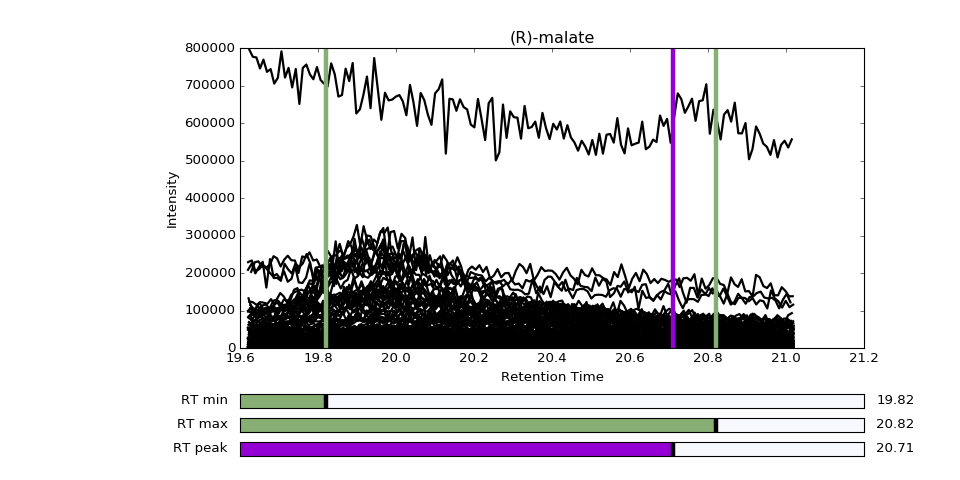

In [42]:
dp = reload(dp)
dp.adjust_rt_for_selected_compound(data,compound_grid)

# Define a pre-existing datafile and location to save plots

In [ ]:
my_file = '/global/homes/b/bpb/data/hedlund/20160503_Bhedlund_pHILIC_POS_Present.pkl'
plot_location_label = '/global/homes/b/bpb/Downloads/hedlund/TestIDFigs'

# Make Supplementary Tables

In [ ]:
peak_height = dp.make_output_dataframe(input_fname = my_file, fieldname='peak_height' , output_loc=plot_location_label+'/sheets')

# Error bar

In [ ]:
dp.plot_errorbar_plots(peak_height,input_fname = my_file, output_loc=plot_location_label+'/error_bar_peak_height')

# Make Chromatograms

In [ ]:
dp = reload(dp)
dp.plot_all_compounds_for_each_file(input_fname = my_file, nCols = 8, scale_y=True , output_loc=plot_location_label+'/scaled_all_compounds_each_file')
dp.plot_all_files_for_each_compound(input_fname = my_file, nCols = 6, scale_y=True , output_loc=plot_location_label+'/scaled_all_files_each_compound')
dp.plot_all_compounds_for_each_file(input_fname = my_file, nCols = 8, scale_y=False , output_loc=plot_location_label+'/all_compounds_each_file')
dp.plot_all_files_for_each_compound(input_fname = my_file, nCols = 6, scale_y=False , output_loc=plot_location_label+'/all_files_each_compound')

# Make Identification Figures

In [ ]:
dp = reload(dp)
dp.make_identification_figure(input_fname = my_file, output_loc=plot_location_label+'/identification')